## Supervised Machine Learning: Regression - Final Assignment

### Instructions:
In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?

## Section One: Objectives

#### MAIN OBJECTIVE: Perform a prediction on the car sales dataset using appropraite regression models

2) Description of the car sales dataset specifically its attributes 

3) Perform exploratory data analysis and cleaning to present it adequately for subsequent tasks.

4) Perform regression on the cleaned data using variouse regression models. I.e., linear regression, and regularization tecniques.

5) Provide a recommendation for the most effective model

6) Provide key findings and insights derived 

7) Provde future directions

## Section Two: About the Data

### Choosing dataset
1. For this lab, we will be using the car sales dataset, hosted on IBM Cloud object storage. The dataset contains all the information about cars, the name of the manufacturer, the year it was launched, all car technical parameters, and the sale price. 

2. This dataset has already been pre-cleaned and encoded (using one-hot and label encoders) in the Linear Regression Notebook.

3. It contains 205 instances and 36 attributes. The 'price' is the target class for which we want to make predictions given the other atraibutes.

4. There are no missing values as the data is already pre-cleaned

### Importing the Dataset
Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.

Read your chosen dataset into pandas dataframe:

## Import the required libraries

In [1]:
#we import libraries from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import seaborn as sns
from scipy.stats import normaltest

def warn(*args, **kwargs):
    pass
warnings.warn = warn

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures) 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('Datasets\encoded_car_data.csv')
data.head(5)

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [3]:
data.shape
#data.isnull().sum()

(205, 36)

In [4]:
#data.info()
data.price.mean()

13276.710570731706

<AxesSubplot:>

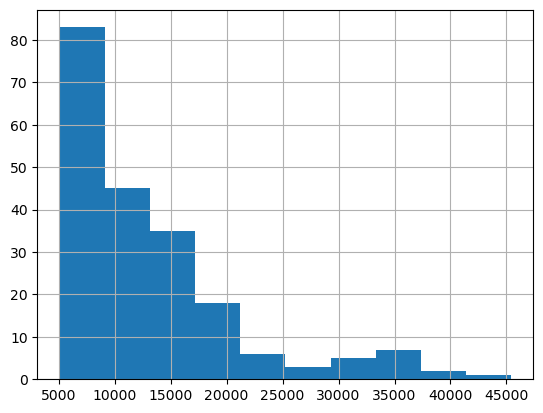

In [5]:
data.price.hist()

The target vaiable 'prices' is not nornally distributed. Its is negatively skewed.

In [6]:
#sns.distplot(np.sqrt(data.price))

## 3. Linear Regression Models

### Linear Regression

In [7]:
# In this section, we start by performing a linear regression on the datasets (Without feature scaling)
lr = LinearRegression()

X = data.drop('price', axis = 1)
y = data.price

In [8]:
#then we split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state= 42)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr.score(X_test, y_test)
print('R^2 on testing data without scaling or polynomialFeatures', lr.score(X_test, y_test))

R^2 on testing data without scaling or polynomialFeatures 0.8485632504678495


In [9]:
#Lets try applying standard scaler before applying linear regression

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
lr.fit(X_train_s, y_train)

X_test_s = ss.fit_transform(X_test)
lr_pred_s = lr.predict(X_test_s)
#lr.score(X_test_s, y_test)
print('R^2 on testing data with scaling but no polynomialFeatures', lr.score(X_test_s, y_test))

R^2 on testing data with scaling but no polynomialFeatures 0.8508494223948374


Comaring applying linear regression with and without scaling the data, applying linear regression with data feature sca;ing gave a better result

In [10]:
# Let's try making the model a little more complex using the polynomialFeatures and no scaling
pf = PolynomialFeatures(degree = 3, include_bias=False)
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state= 42)

X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

lr.fit(X_train_pf, y_train)
lr_pred_pf = lr.predict(X_test_pf)
lr.score(X_test_pf, y_test)
print('R^2 on testing data with scaling', lr.score(X_test_pf, y_test))
print("R^2 on training data:", lr.score(X_train_pf, y_train))

R^2 on testing data with scaling -30355.75562382827
R^2 on training data: 0.9985384265431325


We see the model has a negative  𝑅2
  on the test data set, this is sign of overfiting.

In [11]:
# Let's try making the model a little more complex using the polynomialFeatures and scaling
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3, include_bias = False)),('regression', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("R-squared:", pipeline.score(X_test, y_test))

R-squared: -30355.75562382827


To search for the best combination of hyperparameters, we create a GridSearchCV object with dictionary of parameter values. The parameters of pipelines can be set using the name of the key separated by '__', then the parameter name of the key.

In [12]:
pipelineCV = Pipeline([('polynomial', PolynomialFeatures(include_bias = False)),
                     ('regression', LinearRegression())
])

param_grid = {'polynomial__degree': [1,2,3,4]}

pipelineCV.fit(X_train, y_train)
search = GridSearchCV(pipelineCV, param_grid, n_jobs = -1)


search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('regression', LinearRegression())]),
             n_jobs=-1, param_grid={'polynomial__degree': [1, 2, 3, 4]})

In [13]:
best_params = search.best_params_
best_params

{'polynomial__degree': 1}

In [14]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('regression', LinearRegression())])

In [15]:
best.score(X_test,y_test)

0.9676510618958535

In [16]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

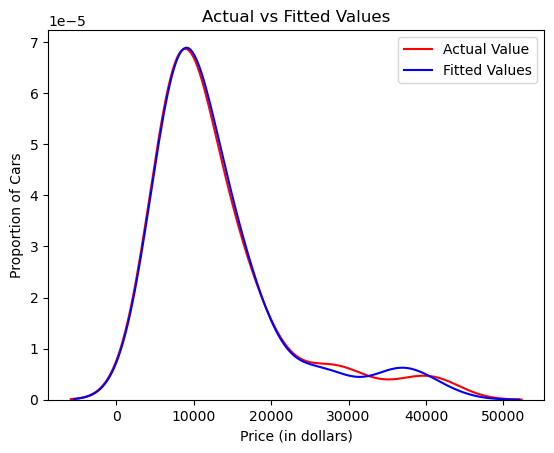

In [17]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)

### Ridge Regression

In [18]:
#Now let's try using Ridge regression with gridsearch to get the perfect value of alpha
param_grid = {'alpha': [0.1, 0.001, 0.01, 1.0, 0.0001]}

s = StandardScaler()
r = Ridge()
grid_search = GridSearchCV(estimator = r, param_grid = param_grid, scoring = 'r2')

X_train_gs = s.fit_transform(X_train)
X_test_gs = s.transform(X_test)

grid_search.fit(X_train_gs, y_train)
print('The best parameter is: {}'.format(grid_search.best_params_['alpha']))
print('The best score is: {}'.format(grid_search.best_score_))

The best parameter is: 1.0
The best score is: 0.8041539128643448


In [19]:
#Ridge regression with gridsearch with no scaling
param_grid = {'alpha': [0.1, 0.001, 0.01, 1.0, 0.0001]}

r = Ridge()
grid_search = GridSearchCV(estimator = r, param_grid = param_grid, scoring = 'r2')

grid_search.fit(X_train, y_train)
print('The best parameter is: {}'.format(grid_search.best_params_['alpha']))
print('The best score is: {}'.format(grid_search.best_score_))

The best parameter is: 1.0
The best score is: 0.8211067134694595


In [20]:
#Ridge without scaling and using defual parameters
r.fit(X_train, y_train)

r.score(X_test, y_test)

0.8079830689074476

In [21]:
#Using pipeline in ridge with polynomial features and standard scaling
input = [('polynomial', PolynomialFeatures(degree = 2, include_bias = False))
         , ('ss', StandardScaler()),
         ('model', Ridge(alpha = 1))]

pipe = Pipeline(input)
pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)
print('Test data:',pipe.score(X_test, y_test))
print('Train data:',pipe.score(X_train, y_train))

Test data: 0.8789668271159761
Train data: 0.9840820210795177


In [22]:
#Using gridsearch in ridge with polynomial features and scaling
param_grid = {'polynomial__degree': [1,2,3,4], 'model__alpha': [0.0001,0.001,0.01,0.1,1,10]}

grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, n_jobs = -1)
grid_search.fit(X_train, y_train);
#pd.DataFrame(grid_search.cv_results_).head(3)
print('Test data:',grid_search.score(X_test, y_test))
print('Train data:',grid_search.score(X_train, y_train))

Test data: 0.905254868161106
Train data: 0.9757278801669176


In [23]:
best_params = grid_search.best_params_
best_params

{'model__alpha': 10, 'polynomial__degree': 2}

In [24]:
best=grid_search.best_estimator_

best.score(X_test, y_test)

0.905254868161106

### Lasso Regression

In [25]:
#Now let's try using Lasso regression with gridsearch to get the perfect value of alpha
param_grid = {'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}

s = StandardScaler()
ls = Lasso()
grid_search = GridSearchCV(estimator = ls, param_grid = param_grid, scoring = 'r2')

X_train_ls = s.fit_transform(X_train)
X_test_ls = s.transform(X_test)

grid_search.fit(X_train_ls, y_train)
print('The best parameter is: {}'.format(grid_search.best_params_['alpha']))
print('The best score is: {}'.format(grid_search.best_score_))

The best parameter is: 100
The best score is: 0.8291581316112996


In [26]:
#Lasso regression with gridsearch with no scaling
param_grid = {'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}

ls = Lasso()
grid_search = GridSearchCV(estimator = ls, param_grid = param_grid, scoring = 'r2')

grid_search.fit(X_train, y_train)
print('The best parameter is: {}'.format(grid_search.best_params_['alpha']))
print('The best score is: {}'.format(grid_search.best_score_))

The best parameter is: 10
The best score is: 0.8033509985426243


In [27]:
#Lasso without scaling and using defual parameters
ls.fit(X_train, y_train)

ls.score(X_test, y_test)

0.8423138719885117

In [28]:
#Using pipeline in lasso with polynomial features and standard scaling
input = [('polynomial', PolynomialFeatures(degree = 2, include_bias = False))
         , ('ss', StandardScaler()),
         ('model', Lasso(alpha = 10))]

pipe = Pipeline(input)
pipe.fit(X_train, y_train)
prediction = pipe.predict(X_test)
print('Test data:',pipe.score(X_test, y_test))
print('Train data:',pipe.score(X_train, y_train))

Test data: 0.8684246448516278
Train data: 0.9815549586123616


In [29]:
#Using gridsearch in lasso with polynomial features and scaling
param_grid = {'polynomial__degree': [1,2,3,4], 'model__alpha': [0.0001,0.001,0.01,0.1,1,10]}

grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, n_jobs = -1)
grid_search.fit(X_train, y_train);
#pd.DataFrame(grid_search.cv_results_).head(3)
print('Test data:',grid_search.score(X_test, y_test))
print('Train data:',grid_search.score(X_train, y_train))

Test data: 0.8819168150133283
Train data: 0.9853775878813609


In [30]:
best_params = grid_search.best_params_
best_params


{'model__alpha': 10, 'polynomial__degree': 3}

In [31]:
best=grid_search.best_estimator_

best.score(X_test, y_test)

0.8819168150133283

### Elastic Net

In [32]:
#Ony ElasticNet with no  scaling, polynomial feature or scaling
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [33]:
prediction = enet.predict(X_test)
print('Test data:',enet.score(X_test, y_test))
print('Train data:',enet.score(X_train, y_train))

Test data: 0.8072608281341807
Train data: 0.8988174004967847


In [34]:
#ElasticNet with polynomialFeatures and scaling
Input = [('polynomial', PolynomialFeatures(degree = 2, include_bias = False)),
         ('ss', StandardScaler()),
         ('model', ElasticNet(alpha=0.1, l1_ratio = 0.5))]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

print('Test data:',pipe.score(X_test, y_test))
print('Train data:',pipe.score(X_train, y_train))

Test data: 0.9002575817537904
Train data: 0.9771888935448302


In [40]:
#Now using hyperparameter tunning 
param_grid = {'polynomial__degree': [1,2,3],
             'model__alpha': [0.001,0.01,0.1,1,10],
             "model__l1_ratio":[0.1,0.25,0.75,0.9]}

search = GridSearchCV(estimator = pipe, param_grid = param_grid, n_jobs = -1)
search.fit(X_train, y_train)

best = search.best_estimator_

In [41]:
print('Test data:',best.score(X_test, y_test))
print('Train data:',best.score(X_train, y_train))

Test data: 0.9052494001015493
Train data: 0.9735040961981715


In [42]:
best_params = search.best_params_
best_params

{'model__alpha': 1, 'model__l1_ratio': 0.9, 'polynomial__degree': 2}

### Ploting coefiicints of Linear Regression, Ridge, Lasso and ElasticNet

In [ ]:
plot_coef(X,r,name="Ridge Regression")
plot_coef(X,ls,name="Lasso Regression")
plot_coef(X,enet,name="Elastic net ")
plot_coef(X,enet,name="Elastic net l1_ratio=0 ")

## 4. Insights and key findings

The major finding from the multiple experiments carried out is that:

    1. The Linear_Regression was used with polynomial features of degree 1 of which the grid search was used to 
    search for optimal values of degree. Also, the features are not scaled. The score obtained was 96.76%
    
    2. The ridge regression was used with polynomial features of degree 2, alpha =10, and the datasets was scaled using the
    standardscaler all in a pipe.The grid search was used to find the optimal set of parameters. The score obtained was 90.52%
    
    3. The lasso regression was used with polynomial features of degree 3, alpha =10, and the datasets was scaled using the
    standardscaler all in a pipe. The grid search was used to find the optimal set of parameters. The score obtained was 88.19%
    
    4. The elasticNet regression was used with polynomial features of degree 2, alpha =1,L1_ratio = 0.9 and the datasets was scaled using the
    standardscaler all in a pipe. The grid search was used to find the optimal set of parameters. The score obtained was 90.52%
    
### Conclusion
The Ridge and ElasticNet Regression has a comparative results. Nonetheless, since ridge regression is faster than elastic net, the ridge
regression is selected in this experiment as best.

## 5. Next Steps

1. More values of hyperprameters can be experimented with to acheive even better results.

2. Other feature normalizing techniques such as the MinMaxScaler should be employed for possible better performance.

3. An explicit feature selection could be performed on the dataset before passing to models. This may result to better result.